In [3]:
# 1. magic to print version
# 2. magic so that the notebook will reload external python modules
# https://gist.github.com/minrk/3301035
%load_ext watermark
%load_ext autoreload
%autoreload 
from typing import List
%watermark -a 'Jae H. Choi' -d -t -v -p typing

Jae H. Choi 2020-10-25 23:02:11 

CPython 3.8.3
IPython 7.16.1

typing unknown


> NOTE: Check [Link](https://online.stat.psu.edu/stat200/lesson/6/6.6) for Stat study

# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind_from_stats
from numpy.random import seed
import seaborn as sns; sns.set_style("whitegrid")
medical = pd.read_csv('insurance2.csv')


In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head(3)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
2,28,1,33.00,3,0,2,4449.4620,0


In [7]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
# To show which columns contain nans ('Not A Number').
missingCol = medical.columns[medical.isnull().any()].tolist()

if len(missingCol)!=0:
    plt.rcParams['figure.figsize'] = [12, 10]
    missingCounts = medical[missingCol].isnull().sum()
    plt.plot(missingCounts, kind='barh', figsize=(4,4))
    plt.xlabel('Counts of NaNs')
    plt.show()
else:
    print(f"no missing values.")

no missing values.


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ <font color='red'> 
By using `np.mean()`, `np.std(,ddof=1)`, `np.median()` functions, statistic parameters of sample distribution were drawn. <br>
mean ($\overline{x}$): 13270.42<br>
std ($s$): 12110.01<br>
median: 9382.03
</font>

In [1]:
medical_charges=medical['charges']
print(medical_charges.head(3))
sample_size=len(medical_charges)
print(f'length of the data: {sample_size}')


NameError: name 'medical' is not defined

In [32]:
mean_med_charges=np.mean(medical_charges)
# sample std must have n-1 in denominator. 
std_med_charges=np.std(medical_charges, ddof=1)
median_med_charges=np.median(medical_charges)

print(f"mean: {mean_med_charges:.2f}")
print(f"std: {std_med_charges:.2f}")
print(f"median: {median_med_charges:.2f}")

mean: 13270.42
std: 12110.01
median: 9382.03


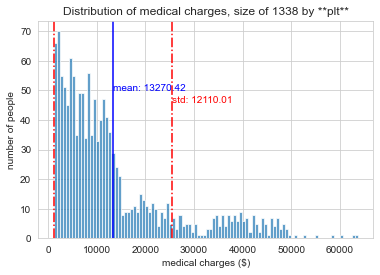

In [46]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
# bin number represents the number of bins (100: 100 bins)
ax.hist(medical_charges, bins=100, alpha=0.7) 
plt.xlabel('medical charges ($)')
plt.ylabel('number of people')
plt.title('Distribution of medical charges, size of 1338 by **plt**')
plt.axvline(mean_med_charges, color='blue', linestyle='-')
plt.axvline(mean_med_charges+std_med_charges, color='r', linestyle='-.')
plt.axvline(mean_med_charges-std_med_charges, color='r', linestyle='-.')
ax.text(x=mean_med_charges+10,y=50, s='mean: 13270.42', alpha=1.0, color='blue')
ax.text(x=mean_med_charges+std_med_charges+10,y=46, s='std: 12110.01', alpha=1.0, color='r')
plt.show()

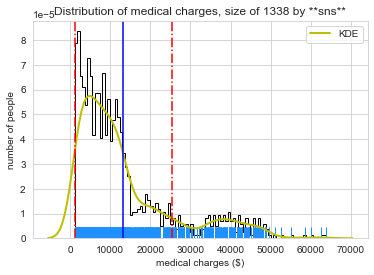

In [48]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax=sns.distplot(medical_charges, bins=100, rug=True, 
             rug_kws={"color": "dodgerblue"},
             kde_kws={"color": "y", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"})
plt.xlabel('medical charges ($)')
plt.ylabel('number of people')
plt.title('Distribution of medical charges, size of 1338 by **sns**')
plt.axvline(mean_med_charges, color='blue', linestyle='-')
plt.axvline(mean_med_charges+std_med_charges, color='r', linestyle='-.')
plt.axvline(mean_med_charges-std_med_charges, color='r', linestyle='-.')
#ax.text(x=mean_med_charges+10,y=50, s='mean: 13270.42', alpha=1.0, color='blue')
#ax.text(x=mean_med_charges+std_med_charges+10,y=46, s='std: 12110.01', alpha=1.0, color='r')
plt.show()

For hypothesis testing, the following assumptions are important to be considered:<br> 
1. **Randomization**: The statement mentioned the samples were randomly selected.<br>
2. **Independence**: Individual medical charges are independent of each other since one does not affect another. Each medical charge is an independent event. <br>
3. **10%** Condition: When the sample is drawn without replacement (usually the case), the sample size, n, should be no more than 10% of the population. Let's assume that the population is over 1338*10. Then,  the sample size of 1338 meets 10% condition.<br>
4. <strong>>30</strong> Rule: In general a sample size of 30 is considered sufficient if the sample is unimodal. In this case, sample size is 1338 > 30. <br>

> Reference: [Central Limit Theorem Assumptions and Conditions](https://cnx.org/contents/7mUmR30Q@1/Central-Limit-Theorem-Assumptions-and-Conditions)

In [124]:
####################### sampled 130 vs. sampled 1338: which is better? #######################
seed(47)
# args: array, size, [0.5, 0.1, 0.1, 0.3]
sampled_charges_130=np.random.choice(medical_charges, size=130, p=None)
size_130=len(sampled_charges_130)
mean_130=np.mean(sampled_charges_130)
# sample std must have n-1 in denominator. 
std_130=np.std(sampled_charges_130, ddof=1)
median_130=np.median(sampled_charges_130)

print(f"size: {size_130}")
print(f"mean: {mean_130:.2f}")
print(f"std: {std_130:.2f}")
print(f"median: {median_130:.2f}")

size: 130
mean: 11218.86
std: 10977.02
median: 8062.11


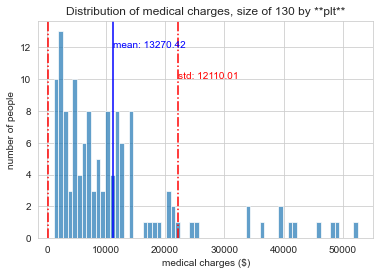

In [125]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
# bin number represents the number of bins (65: 130/2 bins)
ax.hist(sampled_charges_130, bins=65, alpha=0.7) 
plt.xlabel('medical charges ($)')
plt.ylabel('number of people')
plt.title('Distribution of medical charges, size of 130 by **plt**')
plt.axvline(mean_130, color='blue', linestyle='-')
plt.axvline(mean_130+std_130, color='r', linestyle='-.')
plt.axvline(mean_130-std_130, color='r', linestyle='-.')
ax.text(x=mean_130+10,y=12, s='mean: 13270.42', alpha=1.0, color='blue')
ax.text(x=mean_130+std_130+10,y=10, s='std: 12110.01', alpha=1.0, color='r')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 
<font color='red'> critical t-value approach in Hypothesis testing helps determining "likely" or "unlikely". That is, t-value is a cut-off value to compare with observed test statistic. <br> 
    1. Set $H_0$ and $H_a$. <br> 
    2. To conduct the hypothesis test for $\mu_0$, we use the t-statistic $t^*=\frac{\overline{x}-\mu_0}{s / \sqrt{n}}$ which follows a t-distribution with n - 1 degrees of freedom (n-1 independent events). <br> 
    3. Find t-value that makes a Type-1 error ($\alpha$) small (typically 0.01, 0.05, or 0.10 for 99%, 95%, 90% CI respectively). <br>
    4. Compare $t^*$ to t-value. <br>
> Check the [reference](https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/critical-value-approach) for hypothesis testing. <br>  </font>  

<font color='red'>
Here, null hypothesis is that \\$ 12,000 is maintained ($H_0: \mu=12000$) and alternative hypothesis is below \\$ 12,000 ($H_a: \mu<12000$).<br>
Thus, one-tailed test is needed; $t^*=3.837$ and t-value=-1.65. 
Since $\text{t-value} < t^*$, we reject $H_0$. Thus, We need to worry about medical charge falls below \\$ 12,000 based on data. <br>
</font>

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ <font color='red'> 
Since the administrator's concern madical charge below \\$ 12,000, we check **one-side** (one-tailed) test. <br>
t-value: -1.65 <br>
$t^*$: 3.837 <br>
Since $\text{t-value} < t^*$, we reject $H_0$. Thus, We need not to worry about medical charge falls below \\$ 12,000 based on data.
</font>

In [176]:
# alpha=0.05 so that we have only a 5% chance of making a Type I error
alpha = 0.05 
dof = sample_size - 1  # degrees of freedom 
# left tail alpha=0.05, dof=n-1: t.ppf(alpha, dof)
# right tail alpha=0.05, dof=n-1: t.ppf(1-alpha, dof)
t_critical = t.ppf(alpha, dof)
print(f"The critical t-value for 95% confidence interval: {t_critical: .2f} ")

The critical t-value for 95% confidence interval: -1.65 


In [184]:
# Margin of Error: Must be + value for Confidence Interval Test. 
# moe = critical_value * standard_error
# (x-mu)/(s/sqrt(n))
standard_error = std_med_charges / (np.sqrt(sample_size))
margin_of_error_t = abs(t_critical *  standard_error)
print(f"The margin of error is: $ {margin_of_error_t:.2f} ")

The margin of error is: $ 544.94 


In [86]:
t_star=(mean_med_charges-12000)/standard_error
t_star

3.837351719658534

In [171]:
t_critical

-0.23011532797500195

### t critical value test

In [185]:
# t-value test
print(f"{t_critical < t_star}, so failed to reject null hypothesis")

True, so failed to reject null hypothesis


In [186]:
lower_95_t = mean_med_charges - margin_of_error_t
upper_95_t = mean_med_charges + margin_of_error_t

print(f"mu_0: $ {12000:.2f}, \
      \nlower value for 95% CI: $ {lower_95_t:.2f}")

print(f"Since mu_0 falls the outside of 95% confidence interval, the administrator should not worry about medical charges falling below $ 12,000.")


mu_0: $ 12000.00,       
lower value for 95% CI: $ 12725.49
Since mu_0 falls the outside of 95% confidence interval, the administrator should not worry about medical charges falling below $ 12,000.


### Confidence Interval test

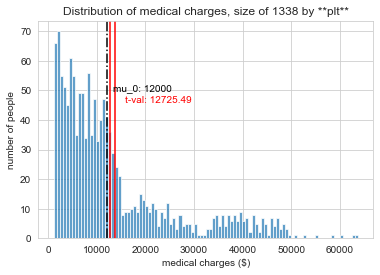

In [190]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
# bin number represents the number of bins (100: 100 bins)
ax.hist(medical_charges, bins=100, alpha=0.7) 
plt.xlabel('medical charges ($)')
plt.ylabel('number of people')
plt.title('Distribution of medical charges, size of 1338 by **plt**')
plt.axvline(12000, color='black', linestyle='-.')
plt.axvline(lower_95_t, color='r', linestyle='-')
plt.axvline(upper_95_t, color='r', linestyle='-')
ax.text(x=mean_med_charges+10,y=50, s='mu_0: 12000', alpha=1.0, color='black')
ax.text(x=lower_95_t+3000,y=46, s='t-val: 12725.49', alpha=1.0, color='r')
plt.show()

The administrator then wants to know whether people with insurance really are charged a different amount to those without. $\rightarrow$ **Use 'insuranceclaim' column in medical data**

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ <font color='red'> 
Assumption: Variances of the two samples (groups) are the same.<br>
$H_0$: there is NO difference in the amount charged between people with insurance and with people without <br> 
$H_\alpha$: there IS a difference in the amount charged between the two groups
</font>
 
> Check reference: [Statistics How To](https://www.statisticshowto.com/homoscedasticity/), [Ohio University Study Guide pdf]()

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ <font color='red'> 
Assumption: Variances of the two samples (groups) are the same.<br>
$H_0$: there is NO difference in the amount charged between people with insurance and with people without (i.e. $\$_{ins0} = \$_{ins1}$) <br> $H_a$: difference in the amount charged between the two groups (i.e. $\$_{ins0} \neq \$_{ins1}$)
</font>

In [127]:
medical.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [156]:
# separate two groups; insured vs. uninsured. 
insured = medical['charges'][medical['insuranceclaim'] == 1]  
uninsured = medical['charges'][medical['insuranceclaim'] == 0]
n_1ins=len(insured)
n_0ins=len(uninsured)
# Next find the mean and standard deviation for insured (1ins) and uninsured (0ins)
mean_1ins = np.mean(insured)
std_1ins = np.std(insured, ddof=1)
print(f"For insured: $ {mean_1ins:.2f}, $ {std_1ins:.2f}")

mean_0ins = np.mean(uninsured)
std_0ins = np.std(uninsured, ddof=1)
print(f"For uninsured: $ {mean_0ins:.2f}, $ {std_0ins:.2f}")

#################### another method ####################
# groupby insurance claim and find the row with(1) or without(0) insurance claims
grouped = medical.groupby('insuranceclaim')
### Calculating different statistics: 
# Calculate n (sample size) 
# (get the first value of the Series) 
# n0 --> no insurance
# n1 --> yes insurance 
n0 = grouped.count().loc[0][0]
n1 = grouped.count().loc[1][0]

# Calculate the mean
x0 = grouped.mean().loc[0,'charges']
x1 = grouped.mean().loc[1,'charges']

# Calculate the standard deviation
s0 = grouped.std().loc[0,'charges']
s1 = grouped.std().loc[1,'charges']

# print(x1, s1)
# print(x0, s0)

For insured: $ 13334.58, $ 12273.75
For uninsured: $ 13179.90, $ 11885.59
13334.584800395916 12273.750078528627
13179.901066754957 11885.593812817744


\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}
Where $n_0$: the number of uninsured people (n_0ins), $n_1$= the number of uninsured people (n_1ins), $s_0$: std of charges for uninsured people, $s_1$: std of charges for uninsured people, 


In [159]:
# Calculate pooled std (s_p)
nume=(n_0ins-1)*(std_0ins**2)+(n_1ins-1)*(std_1ins**2)
denom=n_0ins+n_1ins-2 # (sample_size-2): degree of freedom
std_pool = np.sqrt(nume / denom)

std_pool
print(f"Pooled std: {std_pool: .2f}")

Pooled std:  12114.30


\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}
Where $\bar{x}_0$: the mean of uninsured people (mean_0ins), $\bar{x}_1$= the number of uninsured people (mean_1ins), $n_0$: the number of uninsured people (n_0ins), $n_1$= the number of uninsured people (n_1ins)

In [180]:
# Calculate t-statistic
# Formula (given above)

t_star = (mean_0ins - mean_1ins) / (std_pool * np.sqrt((1/n_0ins) + (1/n_1ins)))
print(f"The t* value is: {t_star:.2f} ")

The t* value is: -0.23 


Difference between cdf and ppf
1. CDF (Cumulative Distribution Function): <br>
args: critical value <br>
output: p-value <br>
2. PPF (Percentile Point Function): <br>
argument: alpha (p-value) <br>
output: critical value <br>

CDF and PPF have inverse relationship

> Check reference: [CDF vs. PPF](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf)

In [181]:
# Calculating the p-value using the t-statistic from above
p_value = t.cdf(t_star, n_0ins+n_1ins-2)
p_value
print(f"P-value given that the null hypothesis is true is: {p_value: .2f}")

P-value given that the null hypothesis is true is:  0.41


Using scipy.stats function
T-test for two independent samples (equal_var = True by default)

> References: [1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind), [2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html#scipy.stats.ttest_ind_from_stats)

In [183]:
# ttest_ind_from_stats(mean1, std1, size1, mean2, std2, size2, equal_var=True)

t_star_stats, p_val_stats = ttest_ind_from_stats(mean_0ins, std_0ins, n_0ins, mean_1ins, std_1ins, n_1ins, equal_var = True)
print("By scipy.stats function")
print(f"t_star: {t_star_stats: .2f}")
print(f"P-value: {p_val_stats: .2f}")

By scipy.stats function
t_star: -0.23
P-value:  0.82


Conclusion: <font color='red'> We failed to reject $H_0$ <br>
where $H_0$: there is NO difference in the amount charged between people with insurance and with people without (i.e. $\$_{ins0} = \$_{ins1}$) </font>

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ <font color='red'> There is no z-test from scipy.stats, but we can define the z-test function to compae two groups.</font>
<code>
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round 
    from scipy.stats import norm 
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2) 
    z = ((X1 - X2) - mudiff)/pooledSE 
    pval = 2*(1 - norm.cdf(abs(z))) 
    return round(z, 3), round(pval, 4)
</code>
> Reference:

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test